# preprocessing

In [102]:
library(datasets)

In [103]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


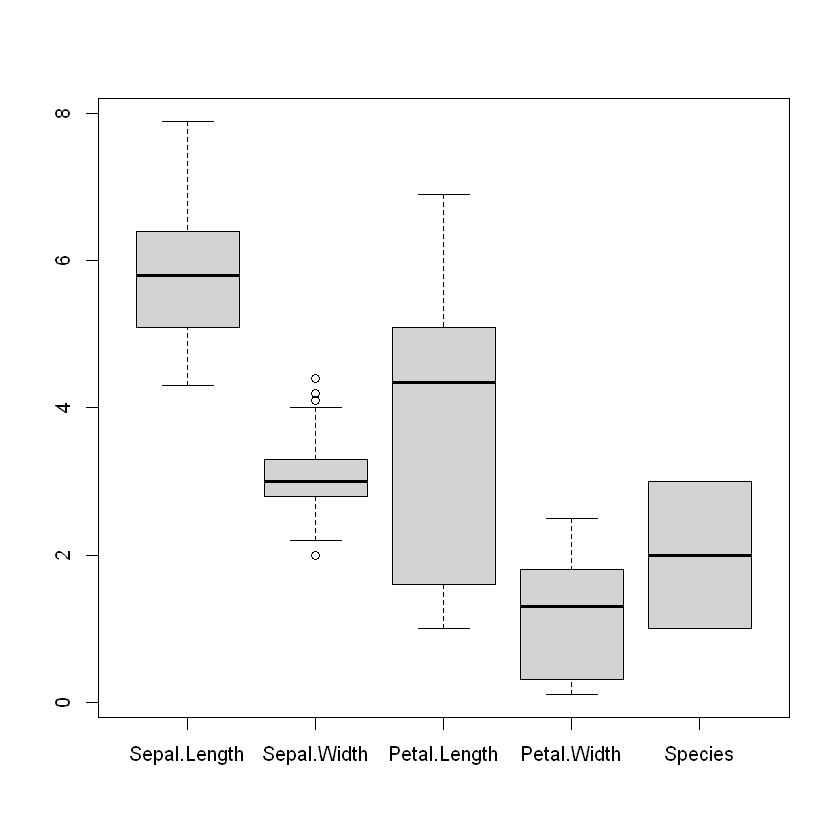

In [104]:
boxplot(iris)

## remove outliares

### IQR

In [105]:
#find Q1, Q3, and interquartile range for values in column A
Q1 <- quantile(iris$Sepal.Width, .25)
Q3 <- quantile(iris$Sepal.Width, .75)
IQR <- IQR(iris$Sepal.Width)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
no_outliers <- subset(iris, iris$Sepal.Width> (Q1 - 1.5*IQR) & iris$Sepal.Width< (Q3 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers)

[1] 146   5

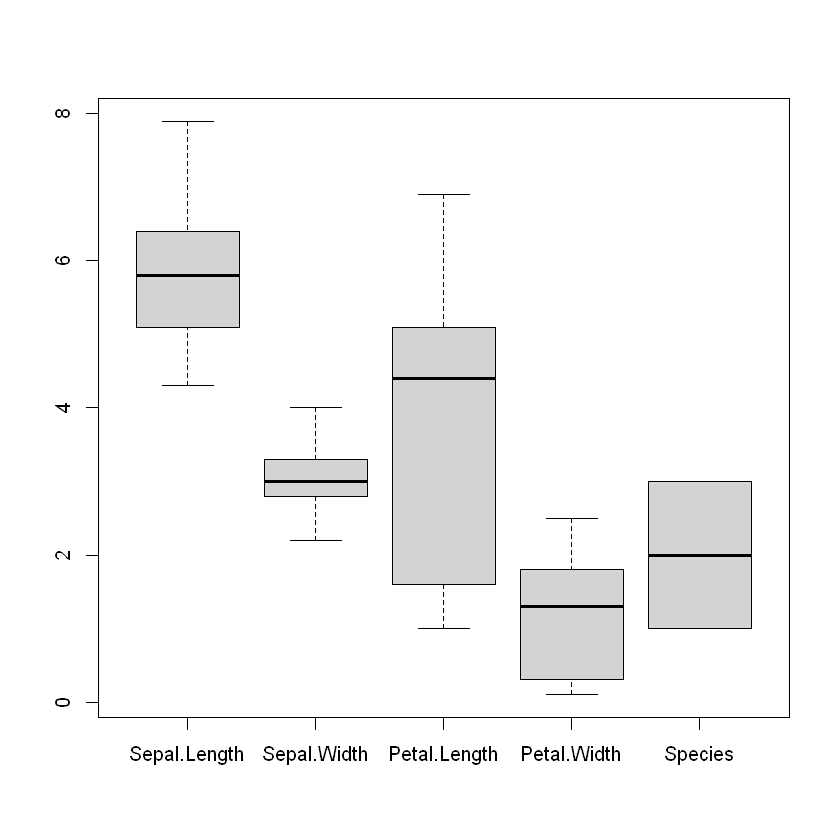

In [106]:
boxplot(no_outliers)

## Normalization

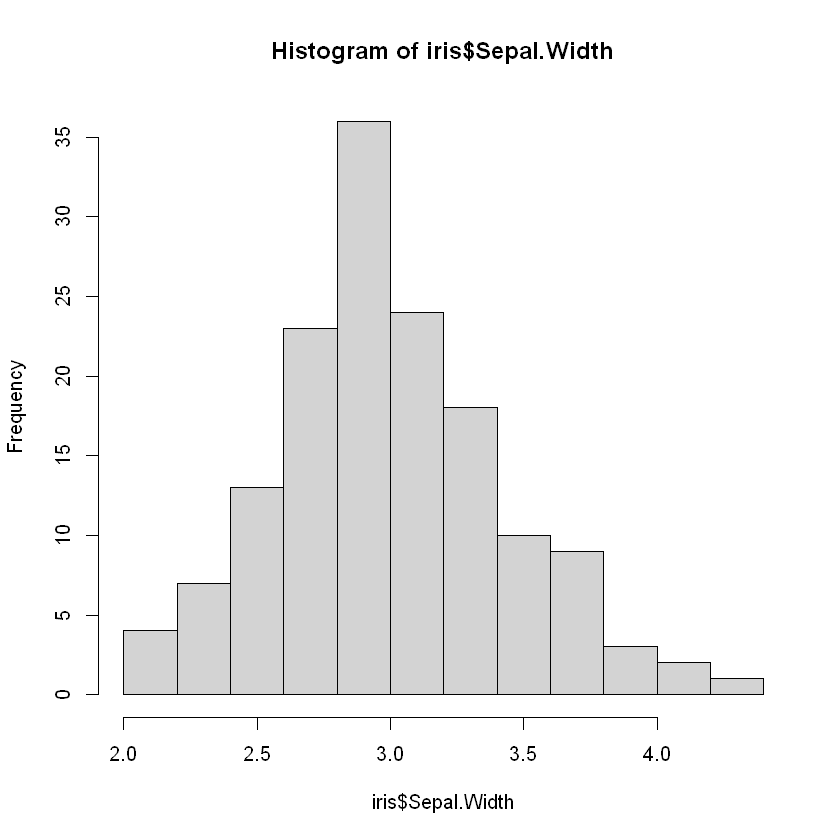

In [107]:
hist(iris$Sepal.Width)

In [108]:
z = function(x) {
  return((x - mean(x)) / sd(x))
}

In [109]:
dfNorm <- as.data.frame(lapply(no_outliers[1:4], z_score))

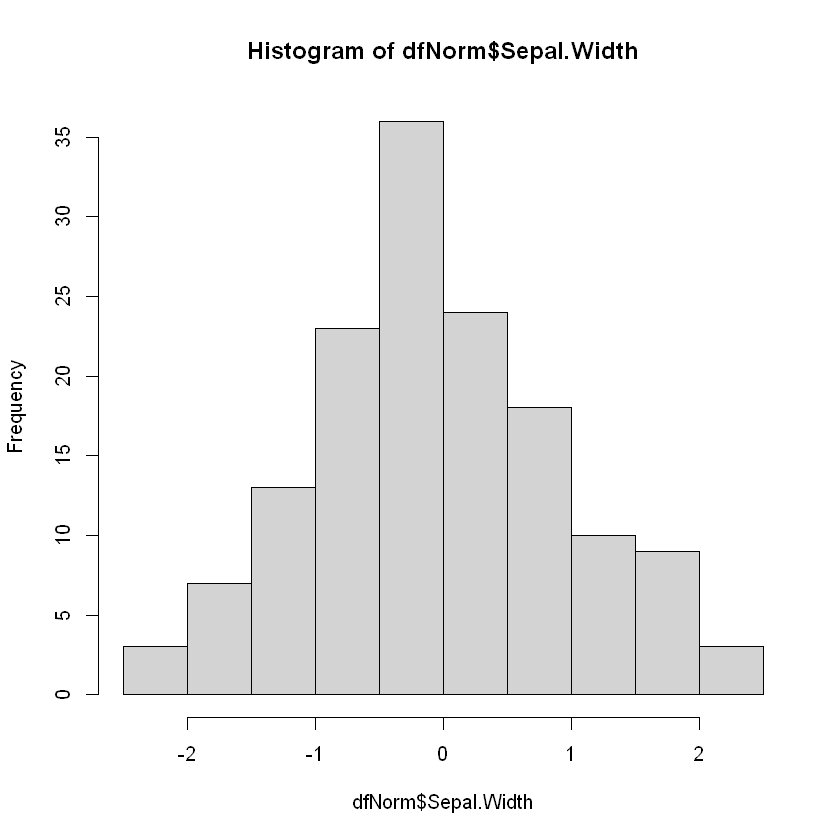

In [110]:
hist(dfNorm$Sepal.Width)

In [111]:
head(dfNorm)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.9073918,1.1551740,-1.369051,-1.343899
2,-1.1471732,-0.1015727,-1.369051,-1.343899
3,-1.3869546,0.4011260,-1.425933,-1.343899
4,-1.5068453,0.1497767,-1.312170,-1.343899
5,-1.0272825,1.4065234,-1.369051,-1.343899
6,-0.5477198,2.1605714,-1.198407,-1.080531


In [112]:
dfNorm$Species <- no_outliers$Species

In [113]:
head(dfNorm)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.9073918,1.1551740,-1.369051,-1.343899,setosa
2,-1.1471732,-0.1015727,-1.369051,-1.343899,setosa
3,-1.3869546,0.4011260,-1.425933,-1.343899,setosa
4,-1.5068453,0.1497767,-1.312170,-1.343899,setosa
5,-1.0272825,1.4065234,-1.369051,-1.343899,setosa
6,-0.5477198,2.1605714,-1.198407,-1.080531,setosa


Clustering automated tools

# PCA

In [114]:
pca_result <- prcomp(no_outliers[1:4], scale = TRUE)
names(pca_result)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [115]:
# means
pca_result$center

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.856849     3.040411     3.806849     1.220548

In [116]:
# standard deviations
pca_result$scale

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.8340932    0.3978526    1.7580419    0.7593934

In [117]:
pca_result$rotation

,PC1,PC2,PC3,PC4
Sepal.Length,0.5265870,-0.34715157,0.7297076,0.2640429
Sepal.Width,-0.2578415,-0.93442278,-0.2162911,-0.1165762
Petal.Length,0.5808933,-0.02740124,-0.1424080,-0.8009570
Petal.Width,0.5646122,-0.07475979,-0.6328230,0.5245562


In [118]:
pca_result$rotation <- -pca_result$rotation
pca_result$rotation

,PC1,PC2,PC3,PC4
Sepal.Length,-0.5265870,0.34715157,-0.7297076,-0.2640429
Sepal.Width,0.2578415,0.93442278,0.2162911,0.1165762
Petal.Length,-0.5808933,0.02740124,0.1424080,0.8009570
Petal.Width,-0.5646122,0.07475979,0.6328230,-0.5245562


In [119]:
pca_result$x <- - pca_result$x
head(pca_result$x)

,PC1,PC2,PC3,PC4
1,2.329727,0.6264351,-0.133429316,-0.017344502
2,2.131951,-0.6311381,-0.230282086,-0.100538622
3,2.420876,-0.2462041,0.045317069,-0.024182975
4,2.353116,-0.5195737,0.094638354,0.069291192
5,2.457668,0.8196814,0.008420448,0.043613126
6,2.151734,1.7151273,0.012540197,0.003419447


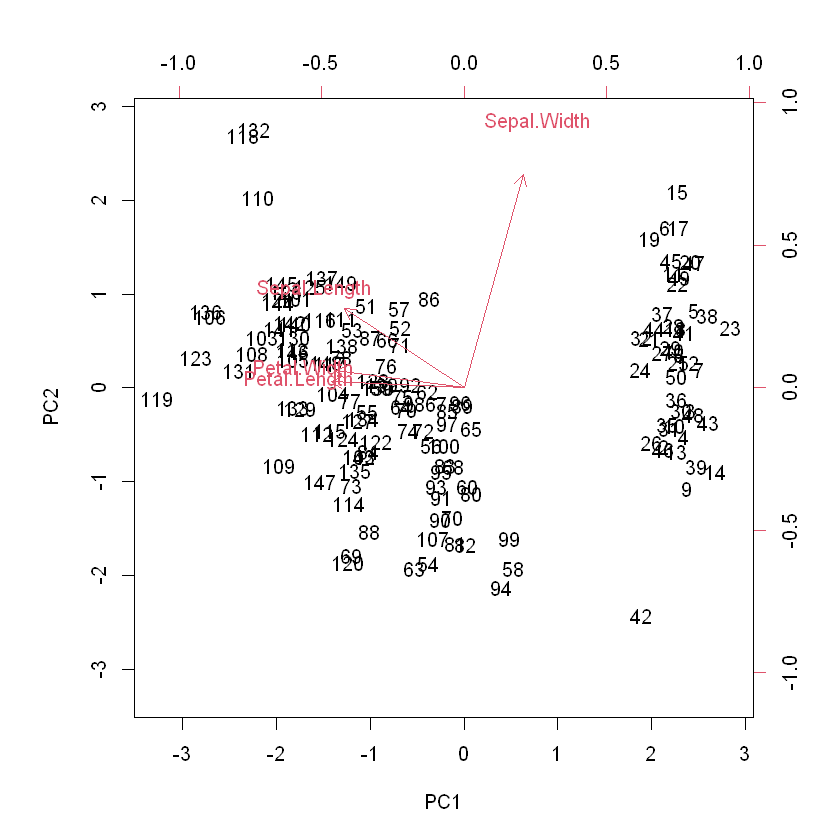

In [120]:
biplot(pca_result, scale = 0)

In [121]:
pca_result$sdev

[1] 1.7065558 0.9566034 0.3892507 0.1451242

In [122]:
(VE <- pca_result$sdev^2)

[1] 2.91233283 0.91509004 0.15151610 0.02106103

In [123]:
PVE <- VE / sum(VE)

In [124]:
round(PVE, 2)

[1] 0.73 0.23 0.04 0.01

#PCA

In [125]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [126]:
myPr <- prcomp(iris[, -5])

In [127]:
myPr <- prcomp(iris[, -5], scale = TRUE)

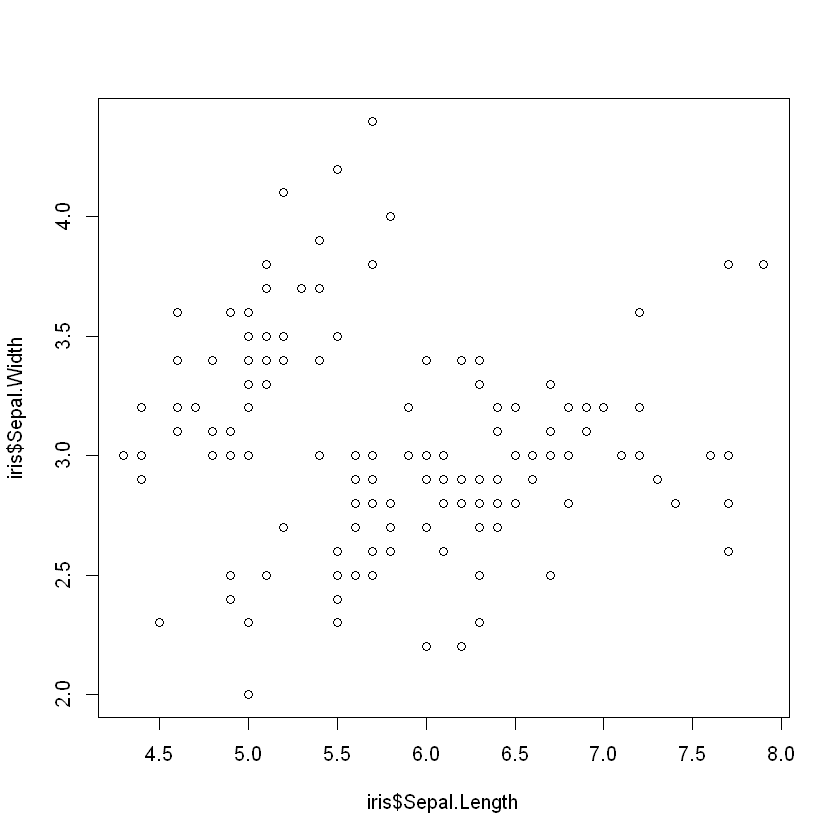

In [128]:
plot(iris$Sepal.Length, iris$Sepal.Width)

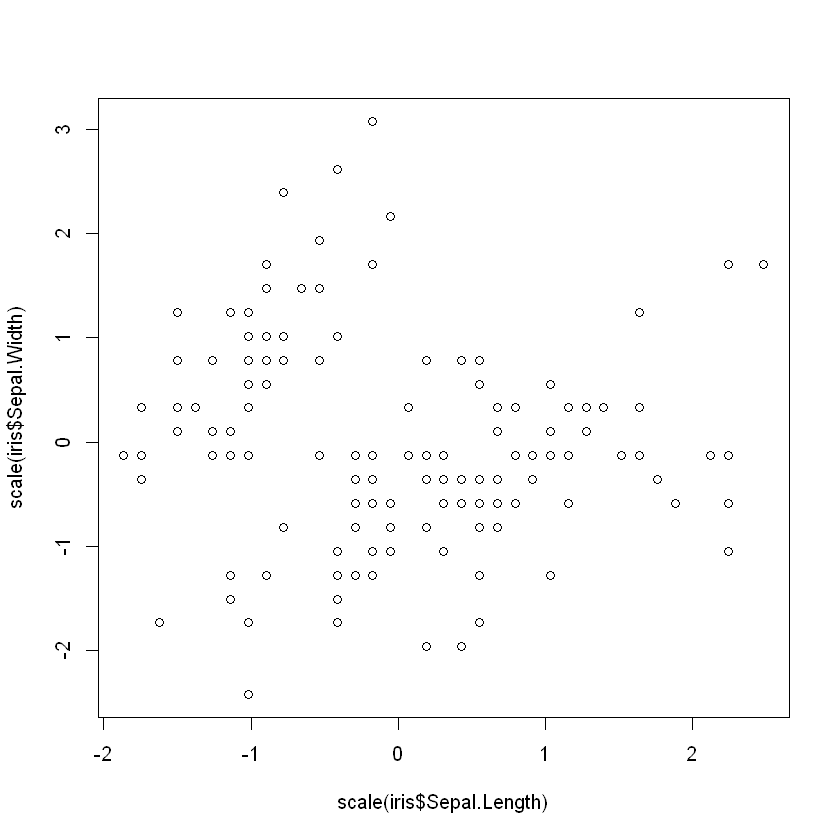

In [129]:
plot(scale(iris$Sepal.Length), scale(iris$Sepal.Width))

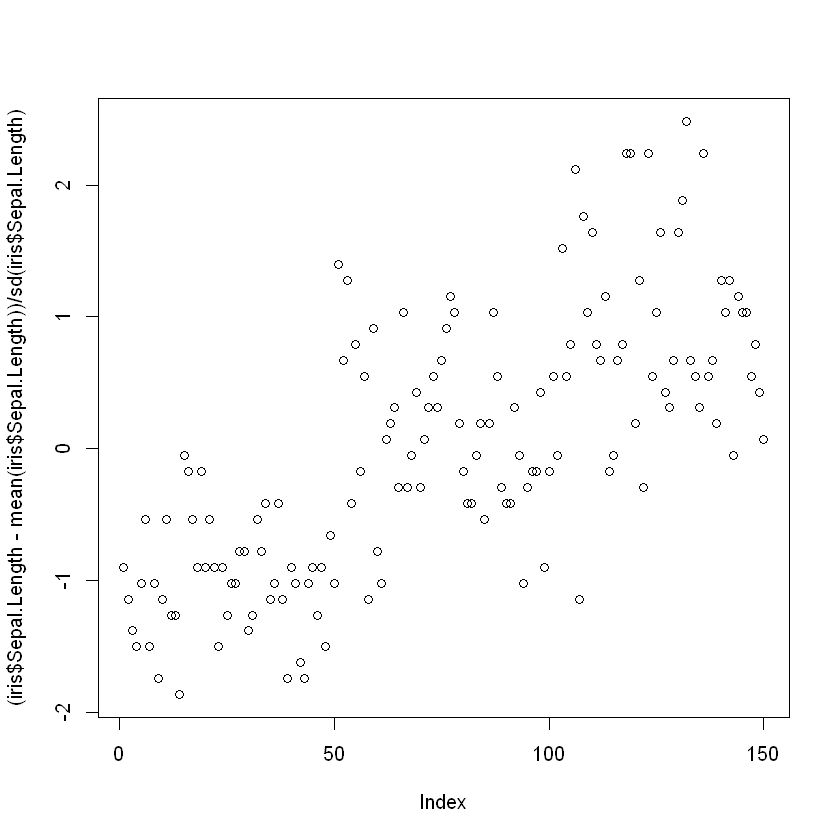

In [130]:
plot((iris$Sepal.Length - mean(iris$Sepal.Length)) / sd(iris$Sepal.Length))

In [131]:
myPr

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

In [132]:
summary(myPr)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

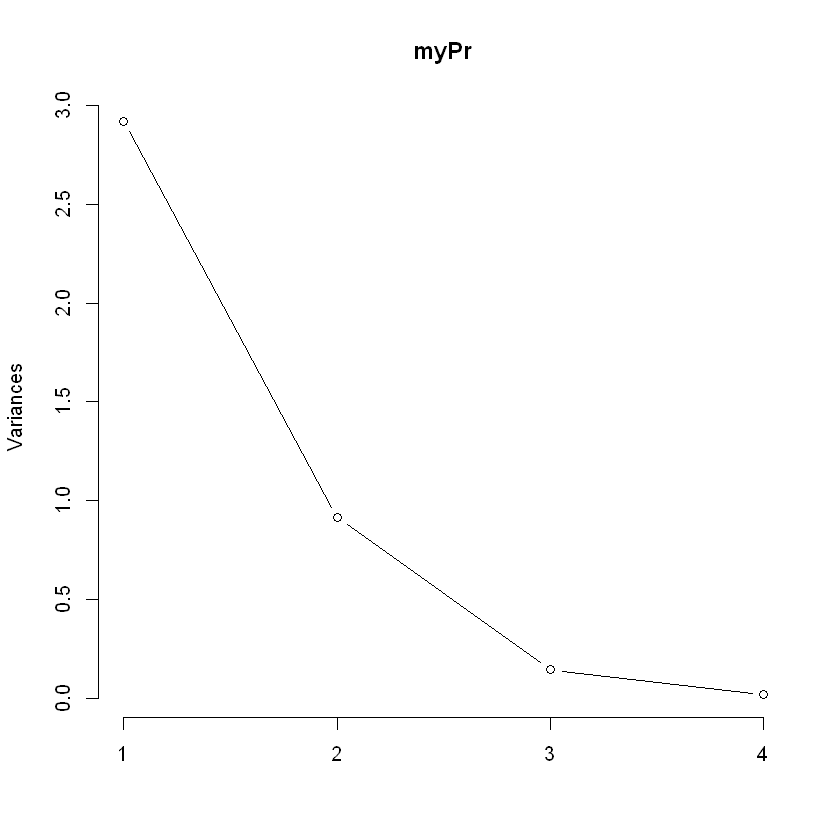

In [133]:
plot(myPr, type = "l")

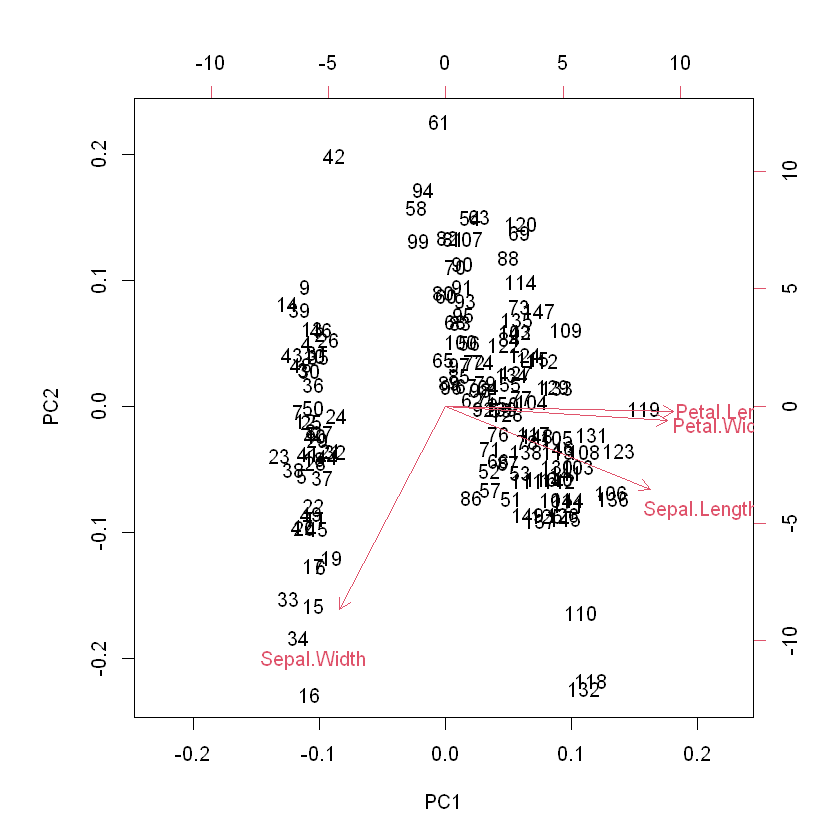

In [134]:
biplot(myPr)

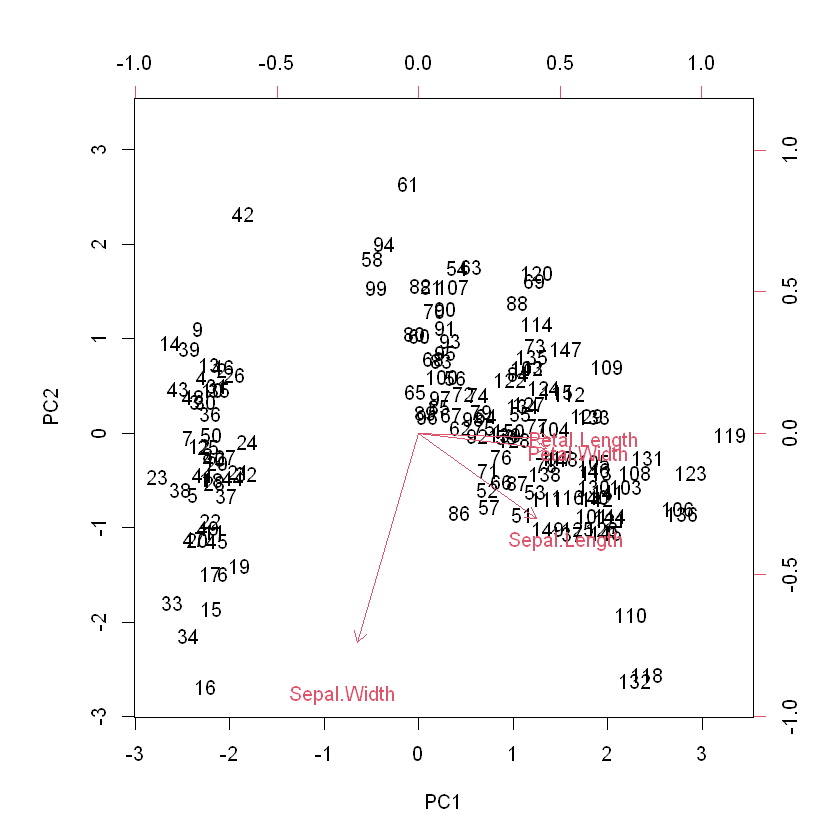

In [135]:
biplot(myPr, scale = 0)

In [136]:
str(myPr)

List of 5
 $ sdev    : num [1:4] 1.708 0.956 0.383 0.144
 $ rotation: num [1:4, 1:4] 0.521 -0.269 0.58 0.565 -0.377 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center  : Named num [1:4] 5.84 3.06 3.76 1.2
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ scale   : Named num [1:4] 0.828 0.436 1.765 0.762
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ x       : num [1:150, 1:4] -2.26 -2.07 -2.36 -2.29 -2.38 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")= chr "prcomp"


In [137]:
myPr$x

PC1,PC2,PC3,PC4
-2.257141,-0.47842383,0.127279624,0.024087508
-2.074013,0.67188269,0.233825517,0.102662845
-2.356335,0.34076642,-0.044053900,0.028282305
-2.291707,0.59539986,-0.090985297,-0.065735340
-2.381863,-0.64467566,-0.015685647,-0.035802870
-2.068701,-1.48420530,-0.026878250,0.006586116
-2.435868,-0.04748512,-0.334350297,-0.036652767
-2.225392,-0.22240300,0.088399352,-0.024529919
-2.326845,1.11160370,-0.144592465,-0.026769540
-2.177035,0.46744757,0.252918268,-0.039766068


In [138]:
iris2 <- cbind(iris, myPr$x)

In [139]:
head(iris2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,-2.257141,-0.4784238,0.12727962,0.024087508
2,4.9,3.0,1.4,0.2,setosa,-2.074013,0.6718827,0.23382552,0.102662845
3,4.7,3.2,1.3,0.2,setosa,-2.356335,0.3407664,-0.04405390,0.028282305
4,4.6,3.1,1.5,0.2,setosa,-2.291707,0.5953999,-0.09098530,-0.065735340
5,5.0,3.6,1.4,0.2,setosa,-2.381863,-0.6446757,-0.01568565,-0.035802870
6,5.4,3.9,1.7,0.4,setosa,-2.068701,-1.4842053,-0.02687825,0.006586116


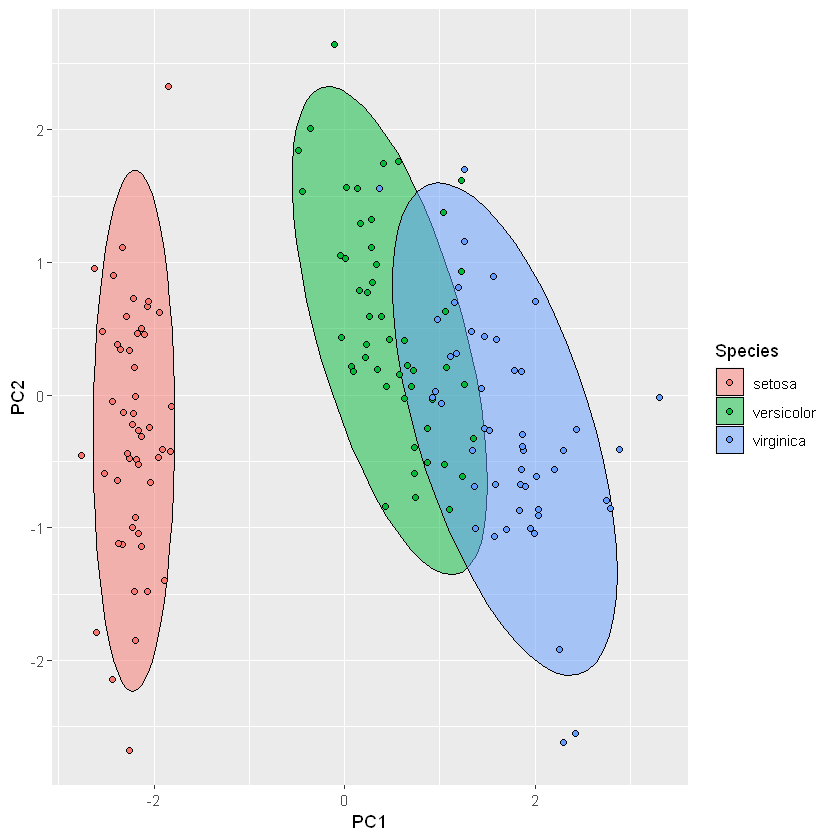

In [140]:
library(ggplot2)

ggplot(iris2, aes(PC1,PC2,col = Species, fill = Species)) +
  stat_ellipse(geom = "polygon", col = "black", alpha = 0.5) +
  geom_point(shape = 21, col = "black")

In [141]:
cor(iris[, -5], iris2[, 6:9])

,PC1,PC2,PC3,PC4
Sepal.Length,0.8901688,-0.36082989,0.27565767,0.03760602
Sepal.Width,-0.4601427,-0.88271627,-0.09361987,-0.01777631
Petal.Length,0.9915552,-0.02341519,-0.05444699,-0.11534978
Petal.Width,0.9649790,-0.06399985,-0.24298265,0.07535950
